## Bem, aqui testaremos alguns modelos de *Aprendizado Supervisionado*

1. Decision Tree ✅

2. Random Forest ✅

3. KNN

4. SVM

5. Linear & Logistic Regression

6. etc ...

In [1]:
import pandas as pd

link = 'C:/Users/CarlosViniMSouza/Documents/Projects/data-mining-ifam/database/Financial-Data.csv'

df = pd.read_csv(link)
df

,Entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,...,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,...,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,...,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17903,9949728,31,monthly,0,3245,0,5,3,2,6,...,700,71700,0.691126,0.928196,0.664112,0.838012,0.727705,0.627705,2,0
17904,9442442,46,bi-weekly,0,6525,0,2,1,3,3,...,800,51800,0.648525,0.970832,0.699241,0.844724,0.774918,0.474918,3,0
17905,9857590,46,weekly,0,2685,0,5,1,1,8,...,1200,59650,0.677975,0.918141,0.687981,0.939101,0.472045,0.672045,9,0
17906,8708471,42,bi-weekly,0,2515,0,3,5,6,1,...,400,80200,0.642741,0.885684,0.456448,0.686823,0.406568,0.406568,3,1


In [2]:
# Verificar tamanho do dataset

df.shape

(17908, 21)

In [3]:
# Checar infos das features

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17908 entries, 0 to 17907
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Entry_id              17908 non-null  int64  
 1   age                   17908 non-null  int64  
 2   pay_schedule          17908 non-null  object 
 3   home_owner            17908 non-null  int64  
 4   income                17908 non-null  int64  
 5   months_employed       17908 non-null  int64  
 6   years_employed        17908 non-null  int64  
 7   current_address_year  17908 non-null  int64  
 8   personal_account_m    17908 non-null  int64  
 9   personal_account_y    17908 non-null  int64  
 10  has_debt              17908 non-null  int64  
 11  amount_requested      17908 non-null  int64  
 12  risk_score            17908 non-null  int64  
 13  risk_score_2          17908 non-null  float64
 14  risk_score_3          17908 non-null  float64
 15  risk_score_4       

In [4]:
# Como não há valores nulos, vamos fazer a correlação das colunas

df.corr() # Lembrando que a coluna-alvo é 'e_signed'

C:\Users\CarlosViniMSouza\AppData\Local\Temp\ipykernel_7004\363722655.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr() # Lembrando que a coluna-alvo é 'e_signed'


,Entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
Entry_id,1.000000,0.004333,0.002528,-0.009034,0.015546,-0.000950,-0.001701,-0.000515,-0.007721,0.007476,0.001720,0.006780,0.013761,-0.005550,0.006963,0.004949,0.006025,0.006392,-0.003492,0.002735
age,0.004333,1.000000,0.142046,0.174062,-0.103635,0.182590,0.146554,-0.013609,0.041332,-0.043808,0.084132,0.162868,-0.019163,0.111258,0.069191,0.093710,0.032265,0.040019,0.041224,-0.096998
home_owner,0.002528,0.142046,1.000000,0.147487,0.018008,0.027367,0.179291,0.013782,-0.047105,-0.076206,0.033996,0.113608,0.000647,0.049708,-0.137293,-0.080470,0.010080,0.005507,0.011215,-0.047409
income,-0.009034,0.174062,0.147487,1.000000,-0.049157,0.102139,0.046982,0.009052,-0.002002,-0.011199,0.289099,0.168375,-0.023627,0.058665,-0.001254,0.025179,-0.008429,-0.003323,0.051622,0.031377
months_employed,0.015546,-0.103635,0.018008,-0.049157,1.000000,-0.189805,-0.056609,0.211605,-0.019645,-0.000546,-0.044234,-0.044765,0.028950,-0.024297,-0.014512,-0.019406,-0.009041,-0.004461,-0.026710,0.010128
years_employed,-0.000950,0.182590,0.027367,0.102139,-0.189805,1.000000,0.343905,-0.052543,0.184879,0.005293,0.084841,0.098960,-0.056574,0.074659,-0.029398,0.000234,0.014162,0.030353,0.011976,0.003748
current_address_year,-0.001701,0.146554,0.179291,0.046982,-0.056609,0.343905,1.000000,0.082491,0.110258,0.017423,0.067893,0.090535,-0.060412,0.058936,-0.161052,-0.094545,0.003362,0.009093,0.013659,-0.018969
personal_account_m,-0.000515,-0.013609,0.013782,0.009052,0.211605,-0.052543,0.082491,1.000000,-0.140649,0.246832,-0.046148,-0.044146,-0.023498,0.029162,-0.060695,-0.033960,-0.016151,-0.009181,-0.028225,-0.081195
personal_account_y,-0.007721,0.041332,-0.047105,-0.002002,-0.019645,0.184879,0.110258,-0.140649,1.000000,-0.030701,0.051857,0.017071,0.027535,0.079175,0.012877,0.042121,0.039808,0.029372,0.003923,-0.024160
has_debt,0.007476,-0.043808,-0.076206,-0.011199,-0.000546,0.005293,0.017423,0.246832,-0.030701,1.000000,-0.008445,-0.020332,-0.034691,0.001108,0.002074,0.002341,-0.021523,-0.009055,-0.001007,0.039192


C:\Users\CarlosViniMSouza\AppData\Local\Temp\ipykernel_7004\3425615277.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, linewidths=.5, ax=ax)


<Axes: >

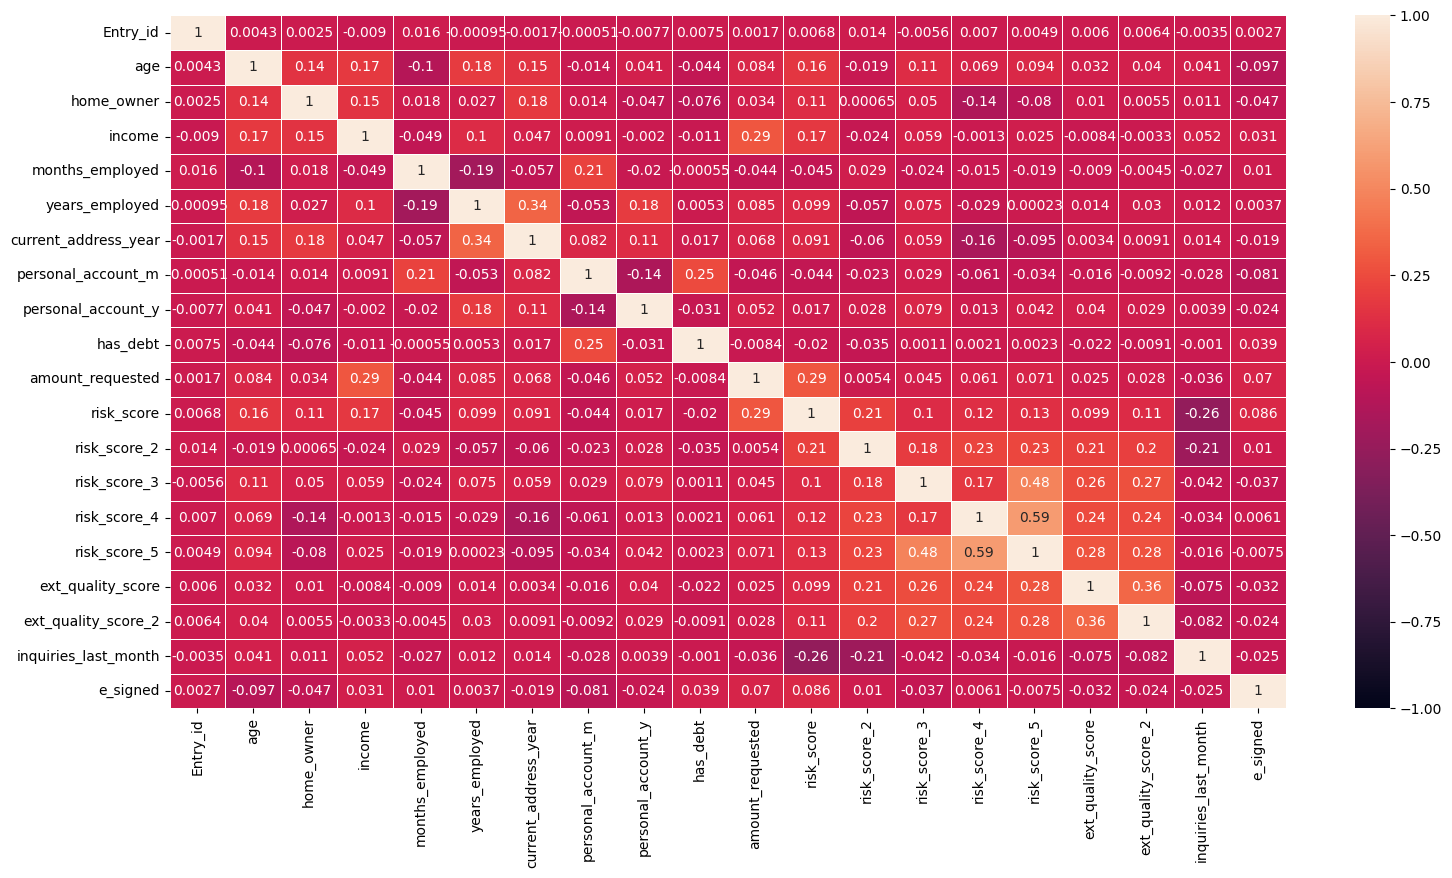

In [5]:
# Para melhorar a percepção da correlação acima, veja o HeatMap
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(figsize=(18, 9)) # aumentar o tam. do mapa de calor

sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, linewidths=.5, ax=ax)

In [6]:
# Bom, é visível que há uma fraca correlação entre as colunas
# Mas, vamos utilizar 4 features com maior correlação para estar análise

In [7]:
# Dataset carregado, vamos aplicar o Classificador de Floresta Aleatória
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

y = df['e_signed'] # coluna-alvo
x = df[[
    'risk_score', 'amount_requested', 'has_debt', 'income' 
]] # colunas com melhor correlação de Pearson

# x = df -> para usar todas as features

In [8]:
# dataset em 30% para testes
from sklearn.model_selection import train_test_split as tts

x_train, x_test, y_train, y_test = tts(x, y, test_size=0.3, random_state=2811)

print(f"Train Set: {x_train.shape}, \nTest Set: {x_test.shape}")

Train Set: (12535, 4), 
Test Set: (5373, 4)


In [9]:
# -> ajustando o conj. treino
model.fit(x_train, y_train)

# -> mostrar acuracia do treino
model.score(x_train, y_train)

0.9997606701236538

In [10]:
# resultados do R2 Score
from sklearn import metrics

predict = model.predict(x_test)

metrics.r2_score(y_test, predict).round(3)

-0.599

In [11]:
# Calcular o Erro Quadrático Médio
EQM = metrics.mean_squared_error(y_test, predict)

print(EQM)

0.3977293876791364
